In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
df = pd.read_csv('./data/data/cars.csv')
df.columns = ['speed','dist']
df

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16
5,9,10
6,10,18
7,10,26
8,10,34
9,11,17


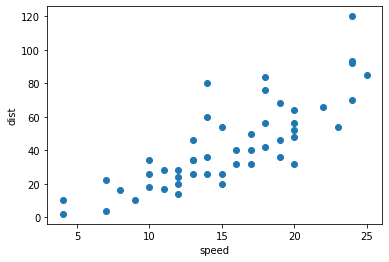

In [7]:
plt.xlabel('speed')
plt.ylabel('dist')
plt.scatter(df['speed'],df['dist'])
plt.show()

In [9]:
x = tf.placeholder( tf. float32)
y = tf.constant(df['dist'], tf.float32)

In [10]:
w = tf.Variable(tf.random_uniform([1]))
b = tf.Variable(tf.random_uniform([1]))

In [11]:
hx = w*x + b
cost = tf.reduce_mean( tf.square(hx-y))

In [11]:
optimizer = tf.train.GradientDescentOptimizer(0.001)
train = optimizer.minimize(cost)

In [11]:
sess = tf.Session()

init = tf.global_variables_initializer() #############중요!!!!!!!!!!!!!!!!!!(variable값 초기화)

sess.run(init)

In [28]:
for i in range(10000):
    sess.run(train,{x:df['speed']})
    if i%100 == 0 :
        print(i,sess.run(cost,{x:df['speed']}))

0 227.57114
100 227.55084
200 227.5314
300 227.51282
400 227.49484
500 227.47774
600 227.46121
700 227.44539
800 227.43024
900 227.41573
1000 227.40172
1100 227.38837
1200 227.37544
1300 227.3631
1400 227.35127
1500 227.33992
1600 227.32898
1700 227.31859
1800 227.30852
1900 227.29892
2000 227.28964
2100 227.28078
2200 227.27226
2300 227.2641
2400 227.25627
2500 227.24875
2600 227.2415
2700 227.23466
2800 227.22795
2900 227.22163
3000 227.21548
3100 227.20961
3200 227.20403
3300 227.19858
3400 227.1934
3500 227.18843
3600 227.18364
3700 227.17906
3800 227.17465
3900 227.17046
4000 227.16644
4100 227.16254
4200 227.15883
4300 227.15521
4400 227.15184
4500 227.14851
4600 227.14537
4700 227.1423
4800 227.13942
4900 227.13663
5000 227.13393
5100 227.1314
5200 227.12889
5300 227.12654
5400 227.12422
5500 227.12212
5600 227.12004
5700 227.11801
5800 227.11607
5900 227.11424
6000 227.11246
6100 227.11075
6200 227.1091
6300 227.10756
6400 227.10605
6500 227.10461
6600 227.10321
6700 227.10193


In [27]:
#자동차 vel 30,50 일때 dist 값
sess.run(hx,{x:[30,50]})

array([ 98.75045, 174.83739], dtype=float32)

In [29]:
sess.run(b)

array([-17.300056], dtype=float32)

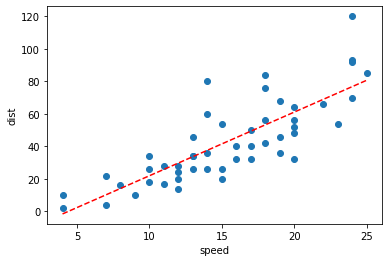

In [35]:
#실측데이터는 scatter로
#예측데이터는 라인그래프로 그림
plt.xlabel('speed')
plt.ylabel('dist')
plt.scatter(df['speed'],df['dist'])
plt.plot(df['speed'],sess.run(hx,{x:df['speed']}),'r--')
plt.show()

In [36]:
sess.run(w)

array([3.9161596], dtype=float32)